In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("anime.csv", index_col=0)
df.head()

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12294 entries, 32281 to 26081
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      12294 non-null  object 
 1   genre     12232 non-null  object 
 2   type      12269 non-null  object 
 3   episodes  12294 non-null  object 
 4   rating    12064 non-null  float64
 5   members   12294 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 672.3+ KB


In [5]:
df.describe( include = "all" ) 

,name,genre,type,episodes,rating,members
count,12294,12232,12269,12294,12064.000000,1.229400e+04
unique,12292,3264,6,187,NaN,NaN
top,Shi Wan Ge Leng Xiaohua,Hentai,TV,1,NaN,NaN
freq,2,823,3787,5677,NaN,NaN
mean,NaN,NaN,NaN,NaN,6.473902,1.807134e+04
std,NaN,NaN,NaN,NaN,1.026746,5.482068e+04
min,NaN,NaN,NaN,NaN,1.670000,5.000000e+00
25%,NaN,NaN,NaN,NaN,5.880000,2.250000e+02
50%,NaN,NaN,NaN,NaN,6.570000,1.550000e+03
75%,NaN,NaN,NaN,NaN,7.180000,9.437000e+03


In [6]:
df = df[df["rating"]>=6].sort_values("rating")
df

,name,genre,type,episodes,rating,members
anime_id,,,,,,
7750,DigiGirl Pop!: Strawberry &amp; Pop Mix Flavor,"Comedy, Sci-Fi",TV,26,6.00,143
31738,Nanairo Kakumei,"Comedy, School, Shoujo",Special,3,6.00,477
24275,Medamayaki no Kimi Itsu Tsubusu?,"Comedy, Seinen",Special,4,6.00,712
8333,Kodomo no Keijijougaku,Fantasy,ONA,1,6.00,543
33856,"Saitama-ken Zaijuu, Fujiyama Osamu, 33-sai, Mu...",Comedy,ONA,25,6.00,31
...,...,...,...,...,...,...
33607,Kahei no Umi,Historical,Movie,1,9.33,44
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
23005,Mogura no Motoro,Slice of Life,Movie,1,9.50,62


In [7]:
df = df[df["members"]>1000].sort_values("members")
df


,name,genre,type,episodes,rating,members
anime_id,,,,,,
8365,Crayon Shin-chan Movie 13: Densetsu wo Yobu Bu...,"Comedy, Ecchi, Kids, School, Shounen, Slice of...",Movie,1,6.85,1001
7336,Cyborg 009: Chou Ginga Densetsu,"Action, Sci-Fi, Space",Movie,1,6.59,1003
31113,Puchitto Furikaerintia,"Action, Adventure, Mecha, Sci-Fi",Special,1,6.33,1003
5652,Glass no Kantai: La Legende du Vent de l&#039;...,"Adventure, Sci-Fi",Special,2,6.36,1005
988,Shinshaku Sengoku Eiyuu Densetsu: Sanada Juu Y...,"Action, Comedy, Historical, Military, Samurai",TV,12,6.51,1006
...,...,...,...,...,...,...
6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100


In [8]:
df = df.dropna(how='any')
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6172 entries, 8365 to 1535
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      6172 non-null   object 
 1   genre     6172 non-null   object 
 2   type      6172 non-null   object 
 3   episodes  6172 non-null   object 
 4   rating    6172 non-null   float64
 5   members   6172 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 337.5+ KB


In [9]:
final_data = df.drop_duplicates()
final_data.head()

,name,genre,type,episodes,rating,members
anime_id,,,,,,
8365,Crayon Shin-chan Movie 13: Densetsu wo Yobu Bu...,"Comedy, Ecchi, Kids, School, Shounen, Slice of...",Movie,1,6.85,1001
7336,Cyborg 009: Chou Ginga Densetsu,"Action, Sci-Fi, Space",Movie,1,6.59,1003
31113,Puchitto Furikaerintia,"Action, Adventure, Mecha, Sci-Fi",Special,1,6.33,1003
5652,Glass no Kantai: La Legende du Vent de l&#039;...,"Adventure, Sci-Fi",Special,2,6.36,1005
988,Shinshaku Sengoku Eiyuu Densetsu: Sanada Juu Y...,"Action, Comedy, Historical, Military, Samurai",TV,12,6.51,1006


In [10]:
type_unique = final_data ['type'].unique()
print(type_unique)
type_count = final_data ['type'].value_counts()
print(type_count)

['Movie' 'Special' 'TV' 'OVA' 'Music' 'ONA']
TV         2371
OVA        1697
Special     972
Movie       871
ONA         164
Music        97
Name: type, dtype: int64


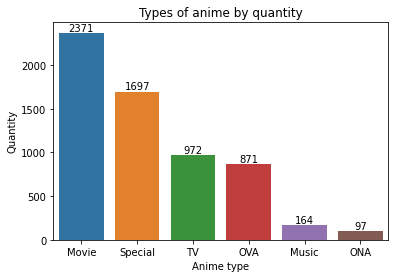

In [11]:
ax = sns.barplot(data=final_data, x = type_unique, y=type_count)
ax.set(xlabel='Anime type', ylabel='Quantity')
ax.bar_label(ax.containers[0])
ax.set_title('Types of anime by quantity')
plt.show()


In [12]:
final_data.groupby(['type']).mean()[['rating', "members"]]

,rating,members
type,,
Movie,7.345270,26921.319173
Music,6.820206,5397.309278
ONA,6.810366,14913.103659
OVA,6.865315,10813.467295
Special,7.009290,12800.734568
TV,7.284757,66972.030789


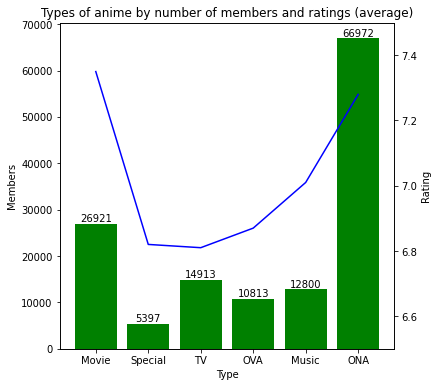

In [13]:
type_by_rating = final_data.groupby(['type']).mean()['rating'].round(2)
type_by_members = final_data.groupby('type')['members'].mean().astype(int)


fig, ax = plt.subplots(1, figsize=(6,6))

p1 = ax.bar(type_unique, type_by_members, color = 'green')
ax2=ax.twinx()
p2 = ax2.plot(type_unique, type_by_rating, color = 'blue') 

ax.set_xlabel('Type') 
ax.set_ylabel('Members') 
ax2.set_ylabel('Rating') 
ax2.set_ylim(6.5,7.5)
ax.bar_label(ax.containers[0])
ax.set_title('Types of anime by number of members and ratings (average)')

plt.show()

In [14]:
top_10_rating = final_data.nlargest(n=10, columns=['rating'], keep = "all")
top_10_rating

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109


In [15]:
top_10_members = final_data.nlargest(n=10, columns=['members'], keep = "all")
top_10_members

,name,genre,type,episodes,rating,members
anime_id,,,,,,
1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917
16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229
11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796
1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151
20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
10620,Mirai Nikki (TV),"Action, Mystery, Psychological, Shounen, Super...",TV,26,8.07,657190


In [16]:
top_10_combined = top_10_rating.assign(result=top_10_rating['name'].isin(top_10_members['name']))
top_10_combined[top_10_combined['result'] == True]

,name,genre,type,episodes,rating,members,result
anime_id,,,,,,,
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,True
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,True


In [ ]:
# movies ir ona analize

In [ ]:
genre_count = final_data ['genre'].value_counts().nlargest(n=15, keep = "all")
genre_count

Hentai                                         507
Comedy                                         136
Music                                           69
Comedy, Slice of Life                           58
Comedy, School, Slice of Life                   55
Adventure, Comedy, Mystery, Police, Shounen     32
Action, Mecha, Sci-Fi                           31
Action, Adventure, Comedy, Shounen              30
Comedy, Parody                                  29
Adventure, Mecha, Sci-Fi, Shounen               26
Adventure, Comedy, Fantasy, Kids                26
Drama                                           24
Comedy, Sci-Fi                                  24
Comedy, School, Shounen, Sports                 24
Fantasy                                         24
Name: genre, dtype: int64

In [ ]:
def genre_identification (column):
    result_text = ''
    for i in range (0, len(final_data["genre"])):
        if "Comedy" in final_data["genre"][i]:
            result_text += "Comedy"
        # if "Fantasy" in str[i]:
        #     result_text += "Fantasy"
        # if "Adventure" in str[i]:
        #     result_text += "Adventure"
        # if "Romance" in str[i]:
        #     result_text += "Romance"    
        # if "Action" in str[i]:
        #     result_text += "Action"  
        print(result_text)

final_data["filtered_genre"]= final_data["genre"].map(genre_identification)



In [24]:
def genre_identification (str):
    result_text = ''
    if "Comedy" in str:
        result_text += "Comedy"
    if "Fantasy" in str:
        result_text += "Fantasy"
    if "Adventure" in str:
        result_text += "Adventure"
    if "Romance" in str:
        result_text += "Romance"    
    if "Action" in str:
        result_text += "Action"  
    print(result_text)

final_data["filtered_genre"]= final_data["genre"].map(genre_identification)

  

Comedy
Action
AdventureAction
Adventure
ComedyAction
ComedyFantasy
FantasyRomance
Fantasy
ComedyAction
ComedyFantasy
FantasyAdventure

ComedyFantasyAdventureAction

Comedy
Comedy
ComedyFantasyAction


AdventureAction
Action
Action

FantasyRomance
ComedyAction
Action
Action
ComedyRomance

ComedyAdventure
Comedy

ComedyFantasyAdventure

FantasyAdventure
FantasyAdventure
ComedyFantasyAdventure
ComedyAdventure
Comedy
ComedyAdventure
ComedyFantasyAdventure

Action

Fantasy
FantasyAdventure


ComedyFantasyAdventure

ComedyRomance
FantasyAdventureAction

AdventureAction
Adventure
FantasyAction
Comedy
Comedy
FantasyAction
Adventure
ComedyFantasyAdventure
Action
Fantasy
Action
Fantasy
AdventureAction

Romance
ComedyAction
Adventure
Adventure
Fantasy
ComedyAdventureAction
Comedy
Fantasy
FantasyAdventure




FantasyAction
Action
ComedyAction




FantasyAdventure
Action
AdventureAction
ComedyFantasyAdventure
Romance
ComedyFantasyAdventureRomanceAction
Adventure

Comedy



Action
Comedy
Comedy

Act

In [ ]:
# # Comedy
# # Fantasy
# # Adventure
# # Romance
# # Adventure

# # final_data["filtered_genre"] = final_data["genre"].map(genre_identification)
# # final_data

# final_data.head()

# def genre_identification (str):
#     result_text = ''
#     if "Comedy" in str:
#         result_text += "Comedy"
#     if "Fantasy" in str:
#         result_text += "Fantasy"
#     print(result_text)
       
   
    

# #arba
# for number in range(1,101): # du if, kad jei atitinka abi salygas paraso FizzBuzz
#     result_text = ''
#     if number % 2 == 0:
#         result_text += "Fizz"
#     if number % 3==0:
#         result_text += "Buzz"
#     print(number, result_text)


#     ef is_tropical(str):
#     if "tropical" in str:
#         return True
#     return False


# reviews["description"].map(is_tropical) 



# wine_df["description_length"] = wine_df["description"].map(len) #map leidzia fja kita naudoti
# wine_df.head()


# final_data["filtered_genre"] = final_data["genre"].map(genre_identification)
# final_data

# def words_count(txt):
#     return len(txt.split())


#     wine_df["description_world"] = wine_df["description"].map(words_count) 
# wine_df.head()

# def my_function(row):
#     return str(row["country"]) + " " + str(row["province"])


# wine_df["place"] = wine_df.apply(my_function, axis = 1)

# wine_df

,name,genre,type,episodes,rating,members
anime_id,,,,,,
8365,Crayon Shin-chan Movie 13: Densetsu wo Yobu Bu...,"Comedy, Ecchi, Kids, School, Shounen, Slice of...",Movie,1,6.85,1001
7336,Cyborg 009: Chou Ginga Densetsu,"Action, Sci-Fi, Space",Movie,1,6.59,1003
31113,Puchitto Furikaerintia,"Action, Adventure, Mecha, Sci-Fi",Special,1,6.33,1003
5652,Glass no Kantai: La Legende du Vent de l&#039;...,"Adventure, Sci-Fi",Special,2,6.36,1005
988,Shinshaku Sengoku Eiyuu Densetsu: Sanada Juu Y...,"Action, Comedy, Historical, Military, Samurai",TV,12,6.51,1006


In [ ]:
sns.barplot(data=final_data, x = type_unique, y=type_count)

In [ ]:
#KLAUSIMAS

In [28]:
final_data.head() # visa data

,name,genre,type,episodes,rating,members
anime_id,,,,,,
8365,Crayon Shin-chan Movie 13: Densetsu wo Yobu Bu...,"Comedy, Ecchi, Kids, School, Shounen, Slice of...",Movie,1,6.85,1001
7336,Cyborg 009: Chou Ginga Densetsu,"Action, Sci-Fi, Space",Movie,1,6.59,1003
31113,Puchitto Furikaerintia,"Action, Adventure, Mecha, Sci-Fi",Special,1,6.33,1003
5652,Glass no Kantai: La Legende du Vent de l&#039;...,"Adventure, Sci-Fi",Special,2,6.36,1005
988,Shinshaku Sengoku Eiyuu Densetsu: Sanada Juu Y...,"Action, Comedy, Historical, Military, Samurai",TV,12,6.51,1006


In [ ]:
## Noriu is genre stulpelio isrinkti tuos zanrus kurie atitinka kriteriju : Comedy, Fantasy, Adventure, Romance, Action. Paleidus f-ja error nera, 
# bet istacius i map(), ismeta nauja stulpeli ir reikmes visos NAN. Nezinau kur problema

def genre_identification (str):
    result_text = ''
    if "Comedy" in str:
        result_text += "Comedy"
    if "Fantasy" in str:
        result_text += "Fantasy"
    if "Adventure" in str:
        result_text += "Adventure"
    if "Romance" in str:
        result_text += "Romance"    
    if "Action" in str:
        result_text += "Action"  
    print(result_text)

final_data["filtered_genre"]= final_data["genre"].map(genre_identification)

#bandziau ir su loop bet nesigavo, manau kazka ne taip darau ar kazko nesuprantu

In [ ]:
def genre_identification (str):
    result_text = ''
    for i in range (0, len(final_data["genre"])):
        if "Comedy" in str[i]:
            result_text += "Comedy"
        if "Fantasy" in str[i]:
            result_text += "Fantasy"
        if "Adventure" in str[i]:
            result_text += "Adventure"
        if "Romance" in str[i]:
            result_text += "Romance"    
        if "Action" in str[i]:
            result_text += "Action"  
        print(result_text)

final_data["filtered_genre"]= final_data["genre"].map(genre_identification)